In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import VimeoVideo
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils.validation import check_is_fitted

In [13]:
path='/content/drive/MyDrive/data sets/Data.csv'
df=pd.read_csv(path)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      614 non-null    int64  
 1   Gender          614 non-null    int64  
 2   Married         614 non-null    int64  
 3   Education       614 non-null    int64  
 4   Credit_History  614 non-null    int64  
 5   Property_Area   614 non-null    int64  
 6   Loan_Status     614 non-null    int64  
 7   Overall_Income  614 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 38.5 KB


In [16]:
df.set_index('Unnamed: 0', inplace=True)

In [17]:
df.head()

,Gender,Married,Education,Credit_History,Property_Area,Loan_Status,Overall_Income
Unnamed: 0,,,,,,,
0,1,0,1,1,1,1,8.674026
1,1,1,1,1,2,0,8.714568
2,1,1,1,1,1,1,8.006368
3,1,1,0,1,1,1,8.505323
4,1,0,1,1,1,1,8.699515


In [33]:
# SPLITTING THE DATA 3 WAY TRAIN,TEST AND VALIDATION
feature='Loan_Status'
x=df.drop(columns='Loan_Status')
y=df[feature]

In [34]:
x

,Gender,Married,Education,Credit_History,Property_Area,Overall_Income
Unnamed: 0,,,,,,
0,1,0,1,1,1,8.674026
1,1,1,1,1,2,8.714568
2,1,1,1,1,1,8.006368
3,1,1,0,1,1,8.505323
4,1,0,1,1,1,8.699515
...,...,...,...,...,...,...
609,0,0,1,1,2,7.972466
610,1,1,1,1,2,8.320205
611,1,1,1,1,1,9.025456


In [35]:
y

Unnamed: 0
0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [37]:
x_train.shape

(552, 6)

In [38]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=42)

In [39]:
x_train.shape

(496, 6)

In [27]:
#We splitted our data into 3 parts that is x_train,x_val,x_test first we will train the data on x_train then test it on x_val after tunning we will finally test it on x_test

In [44]:
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
z1=accuracy_score(y_train,y_pred_train)

In [45]:
z1 #Accuracy score is almost 100 because decision tree tends to overfit data

0.9959677419354839

In [46]:
#Working with validation Data
y_pred_val=model.predict(x_val)
z2=accuracy_score(y_val,y_pred_val)

In [48]:
z2 #Accuracy score decreased from .995 to .642 we can see that the model was overfitting a lot we have to now adjust the depth of the tree then check accuracy score on test data

0.6428571428571429

In [50]:
tree_depth = model.get_depth()
tree_depth # So there is 24 splits lets try to find the optimal split

24

In [61]:
training_acc=[]
validation_acc=[]

for d in range(1,25):
  test_model=DecisionTreeClassifier(max_depth=d,random_state=42)
  test_model.fit(x_train,y_train)
  #Training
  training_acc.append(test_model.score(x_train,y_train))
  #validation
  validation_acc.append(test_model.score(x_val,y_val))

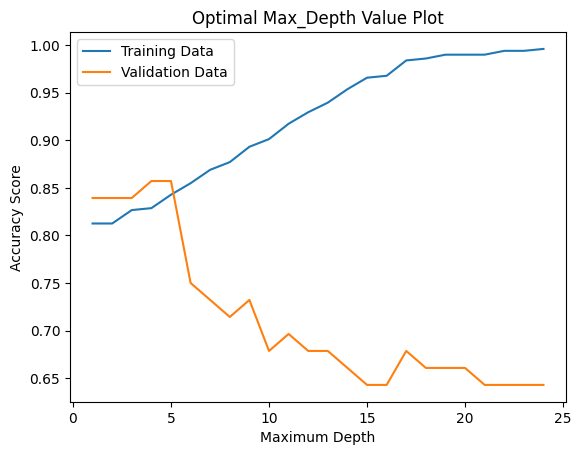

In [68]:
plt.plot(range(1,25),training_acc,label='Training Data')
plt.plot(range(1,25),validation_acc,label='Validation Data')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy Score')
plt.title('Optimal Max_Depth Value Plot')
plt.legend();

In [79]:
# We will work with max_depth of 5 and then check the accuracy score on test data
model=DecisionTreeClassifier(max_depth=5,random_state=42)
model.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
z3=accuracy_score(y_test,y_pred_test)

In [80]:
z3

0.7741935483870968

In [83]:
#Baseline_Accuracy of model
df['Loan_Status'].value_counts(normalize=True).max()

0.6872964169381107

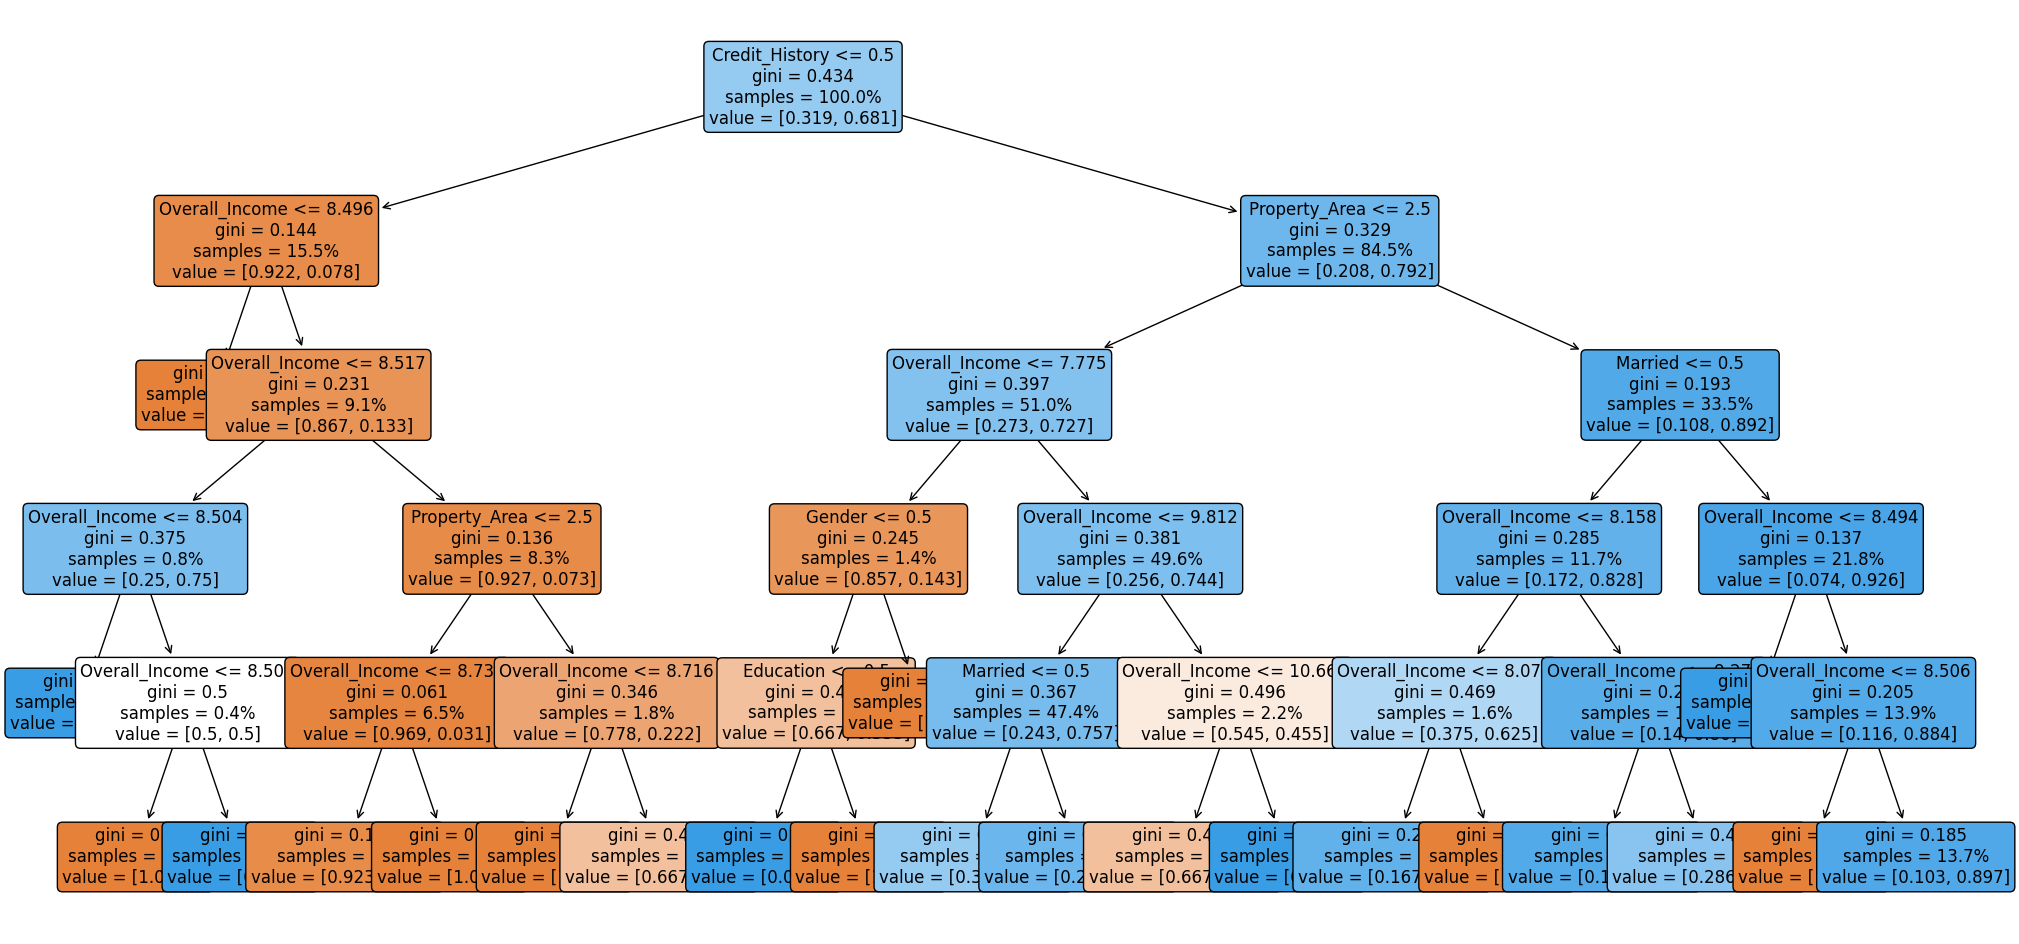

In [85]:
#Plotting my decision tree
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model,
    feature_names=x_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=5,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);